In [1]:
using Images

In [2]:
function images_derivatives(img₁,img₂)

    k_x = [-1.0 1.0;-1.0 1.0]
    k_y = [-1.0 -1.0;1.0 1.0]
    k_t = ones(Float64,2,2)
    
    f_x = imfilter(img₁,k_x) + imfilter(img₂,k_x)
    f_y = imfilter(img₁,k_y) + imfilter(img₂,k_y)
    f_t = imfilter(img₁,-k_t) + imfilter(img₂,k_t)

    return f_x,f_y,f_t
end

function optical_flowHS(img₁,img₂,u₀,v₀,α::Number,tol=1e-7)
    iter = 7 
    # initialize u,v
    u = u₀ 
    v = v₀
    # compute the derivatives
    f_x,f_y,f_t = images_derivatives(img₁,img₂)
    
    # compute the average images
    k_av = [1/12 1/6 1/12;1/6 0 1/6;1/12 1/6 1/12]

    #while norm()

    for i in 1:iter
        
        #compute the local average of the flow vectors
        u_av = imfilter(u,k_av)
        v_av = imfilter(v,k_av)
        
        P = f_x .* u_av + f_y .* v_av + f_t
        D = α + (f_x).^2 + (f_y).^2
        
        
        u = u_av - f_x .* (P ./ D)
        v = v_av - f_y .* (P ./ D)

    end

    return u,v
end


optical_flowHS (generic function with 2 methods)

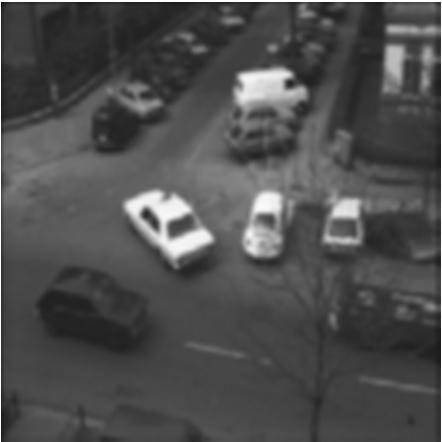

In [3]:
img₁ = imread("/home/elsuizo/Optical_flow/Images/hamburg_tax1.jpg")

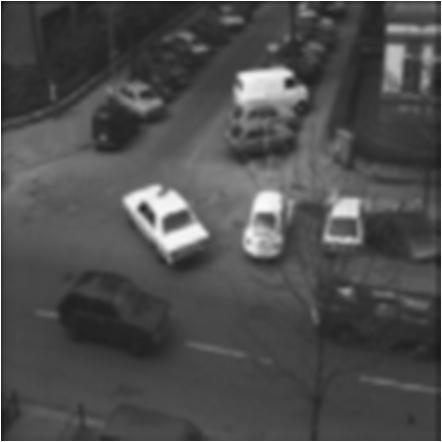

In [4]:
img₂ = imread("/home/elsuizo/Optical_flow/Images/hamburg_tax2.jpg")

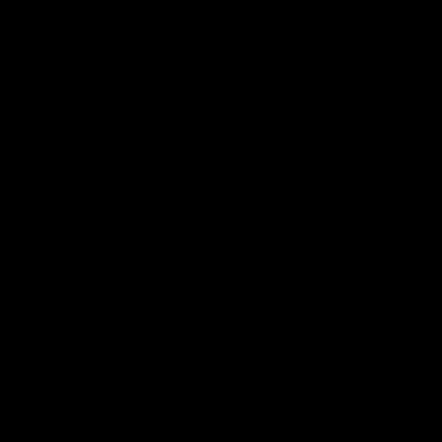

In [5]:
u₀ = zeros(img₁)

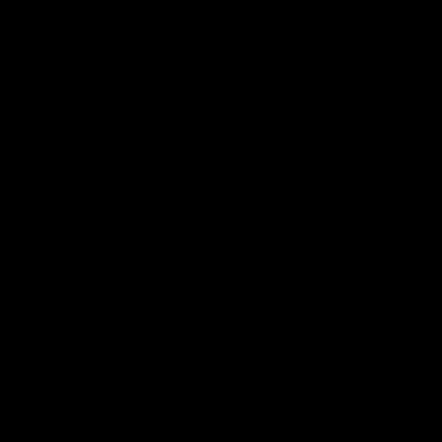

In [6]:
v₀ = zeros(img₂)

In [7]:
u,v = optical_flowHS(img₁,img₂,u₀,v₀,0.3)

(
Gray Image with:
  data: 442x442 Array{Gray{Float64},2}
  properties:
    spatialorder:  x y
    pixelspacing:  1 1
    IMcs: Gray,

Gray Image with:
  data: 442x442 Array{Gray{Float64},2}
  properties:
    spatialorder:  x y
    pixelspacing:  1 1
    IMcs: Gray)

In [14]:
using PyPlot

INFO: Loading help data...


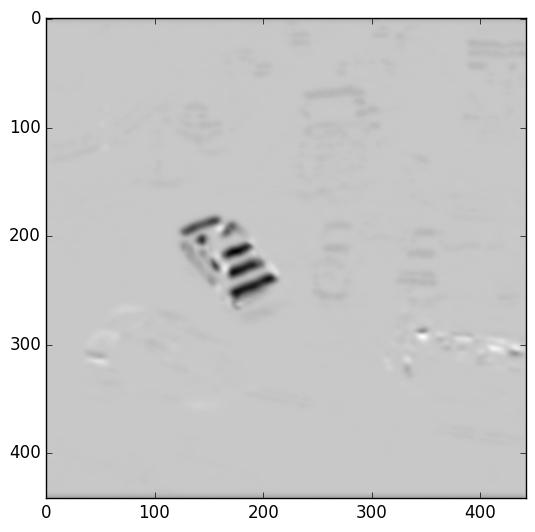

PyObject <matplotlib.image.AxesImage object at 0xabaf892c>

In [15]:
imshow(separate(u),cmap="gray")

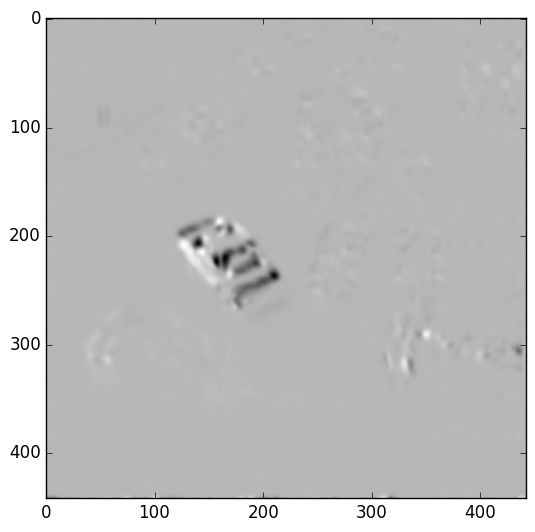

PyObject <matplotlib.image.AxesImage object at 0xab4d03cc>

In [16]:
imshow(separate(v),cmap="gray")

In [29]:
img1 = imread("/home/elsuizo/images/Webcam/omni1.jpg");
img1_gray = convert(Array{Gray},img1);

In [30]:
img2 = imread("/home/elsuizo/images/Webcam/omni2.jpg");
img2_gray = convert(Array{Gray},img2);

In [31]:
u0 = zeros(img1_gray);
v0 = zeros(img2_gray);

In [44]:
@time u1,v1 = optical_flowHS(img1_gray,img2_gray,u0,v0,.3);

elapsed time: 2.433506576 seconds (359506652 bytes allocated, 65.28% gc time)


In [45]:
import Winston